In [1]:
# This script is a test made with the Model ResNet50 to see the difference between glaucoma and normal images

import numpy as np
from matplotlib import pyplot as plt
import glob
import cv2 as cv
from PIL import Image
from sklearn.manifold import TSNE
import pylab
import os
from keras.models import Model
from keras.preprocessing.image import ImageDataGenerator
from keras.models import model_from_json

/home/cvblab03/.virtualenvs/andresEnv/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [18]:
# image size
img_width, img_height = 256, 256
# images to extract features. Must be cropped images
db2test = '../SS_DCGAN/comparison_synthe_imgs_t-sne/synt_real_DCGAN/'
# dense layer to see features
layerFeats = 'dense_1'
# path to the model
model_path='models_t-sne/'
model_name = 'cortadas_ORIGA_model.json'
model_weights = 'cortadas_ORIGA_ResNet50_Batch4final_weights.h5'

In [19]:
# load json of the model
json_file = open(os.path.join(model_path, model_name), 'r')
loaded_model_json = json_file.read()
json_file.close()

# create the model
model = model_from_json(loaded_model_json)

# load the weights
model.load_weights(os.path.join(model_path, model_weights))
#print(model.summary())


model_extractFeatures = Model(outputs=model.get_layer(layerFeats).output, inputs=model.input )

# loading images from test directory
testDatagen = ImageDataGenerator(rescale=1. / 255
                                 )

testGenerator = testDatagen.flow_from_directory(db2test,
                                                target_size=(img_width, img_height),
                                                class_mode=None,
                                                batch_size=2,
                                                shuffle=False
                                                )

features = model_extractFeatures.predict_generator(testGenerator,
                                          steps=np.math.ceil(testGenerator.samples / float(testGenerator.batch_size))
                                          )

Found 1000 images belonging to 2 classes.


In [20]:
labels = []
for name in testGenerator.filenames:
    if 'fake' in name:
        labels.append(1)
    else:
        labels.append(0)

In [21]:
print(features.shape)
print(features.dtype)

(1000, 100)
float32


In [22]:
# convert image data to float64 matrix. float64 is need for bh_sne
x_data = np.asarray(features).astype('float64')

In [23]:
print(x_data.shape)
print(np.array(labels).sum())

(1000, 100)
500


In [24]:
# perform t-SNE embedding
tsne = TSNE(n_components=2)
tsne_results = tsne.fit_transform(x_data)

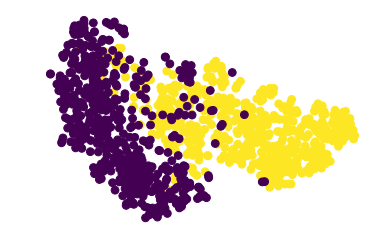

In [25]:
ax = pylab.gca()
ax.scatter(tsne_results[:, 0], tsne_results[:, 1], 60, labels)
#ax.yaxis.set_visible(False)
#ax.xaxis.set_visible(False)
ax.set_axis_off()
pylab.savefig('fake_DCGAN_real.pdf', dpi=1000)
pylab.show()